In [1]:
import os
import gc
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import datetime, nltk, warnings
import matplotlib as mpl
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [27]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

In [29]:

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

### 데이터 로드

In [2]:
data= pd.read_csv('../Project/final.csv')
data.head(10)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,20000.0원 할인,20000.0,110500.0,110500.0,default,VBANK,개발자 커리어,2021-03-28 15:00:11
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,20000.0원 할인,20000.0,116000.0,116000.0,default,CARD,영상 편집,2020-12-02 0:00:00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,19090.0원 할인,19090.0,190900.0,190900.0,default,CARD,NaN,2021-03-04 0:00:00
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,19090.0원 할인,19090.0,190900.0,190900.0,default,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,20000.0원 할인,20000.0,117500.0,117500.0,default,CARD,PPT/보고서,2019-11-14 0:00:00
5,970655,478028.0,201797.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,20000.0원 할인,20000.0,117500.0,117500.0,default,CARD,PPT/보고서,2019-11-14 0:00:00
6,970614,477910.0,1.0,ORDER,CANCELLED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 15:22:36,299000,0.0원 할인,0.0,299000.0,299000.0,default,CARD,NaN,2021-03-28 15:22:36
7,970664,460730.0,200622.0,ORDER,CANCELLED,올인원 패키지 : 기업가치 평가와 M&A 전략 실무,부동산/금융,올인원,2021-03-28 15:25:42,112500,10000.0원 할인,10000.0,122500.0,122500.0,default,CARD,금융/투자 실무,2019-05-02 0:00:00
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,20000.0원 할인,20000.0,116000.0,116000.0,default,CARD,영상 편집,2020-12-02 0:00:00
9,970667,478033.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:48,96000,20000.0원 할인,20000.0,116000.0,116000.0,default,CARD,영상 편집,2020-12-02 0:00:00


### Data_check

In [3]:
data.isnull().sum()

id                            0
customer_id                   0
course_id                     0
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title                  0
coupon_discount_amount        0
sale_price                    0
tax_free_amount               0
pg                            0
method                        0
subcategory_title         19812
marketing_start_at            0
dtype: int64

In [8]:
data.nunique()

id                        105402
customer_id                53742
course_id                   1351
type                           3
state                          5
course_title                1640
category_title                15
format                        15
completed_at               98565
transaction_amount          2391
coupon_title                1884
coupon_discount_amount      1502
sale_price                   741
tax_free_amount              741
pg                             6
method                         8
subcategory_title             33
marketing_start_at         16937
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105402 entries, 0 to 105401
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      105402 non-null  int64  
 1   customer_id             105402 non-null  float64
 2   course_id               105402 non-null  float64
 3   type                    105402 non-null  object 
 4   state                   105402 non-null  object 
 5   course_title            105402 non-null  object 
 6   category_title          105402 non-null  object 
 7   format                  105402 non-null  object 
 8   completed_at            105402 non-null  object 
 9   transaction_amount      105402 non-null  int64  
 10  coupon_title            105402 non-null  object 
 11  coupon_discount_amount  105402 non-null  float64
 12  sale_price              105402 non-null  float64
 13  tax_free_amount         105402 non-null  float64
 14  pg                  

In [5]:
data.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,1.054020e+05,105402.000000,105402.000000,1.054020e+05,1.054020e+05,1.054020e+05,1.054020e+05
mean,1.147066e+06,417240.724227,193830.133660,1.463583e+05,3.144480e+04,1.778030e+05,1.743145e+05
std,1.125905e+05,206421.612434,44136.180706,7.188392e+05,1.183235e+05,7.174715e+05,7.144509e+05
min,5.679930e+05,16.000000,0.000000,-4.144074e+06,-2.280000e+05,-1.800000e+06,-1.800000e+06
25%,1.048947e+06,256401.000000,202789.000000,8.350000e+04,0.000000e+00,1.090000e+05,1.090000e+05
50%,1.135217e+06,501046.000000,203720.000000,1.175000e+05,0.000000e+00,1.340000e+05,1.332000e+05
75%,1.240489e+06,566602.500000,204737.000000,1.590000e+05,2.000000e+04,1.720000e+05,1.720000e+05
max,1.381657e+06,672308.000000,207742.000000,1.134000e+08,1.084407e+07,1.134000e+08,1.134000e+08


###  칼럼 속 카테고리 

id :                        105402 - 고유값

customer_id :               53742 - 보통 1인당 대략 2개 정도 사는 것 같다

course_id :                  1351 - 강의 항목 코드

course_title :                1640 - 강의 제목

marketing_start_at :         16937 - 날짜를 뜻하므로 구간별 짜르기

completed_at :               98565 - 날짜를 뜻하므로 구간별 짜르기

subcategory_title :            33 - 강의를 뜻하는 해시테크 느낌



transaction_amount :         2391 - 가격대를 구간별로 나누기

coupon_title :               1884 - 할인 금액

coupon_discount_amount :      1502 - 할인 가격 구간 나누기

sale_price :                  741 - 가격대의 분포도별로 짜르기

tax_free_amount :              741 - 가격대의 분포도별로 짜르기

subcategory_title :             33 - 강의를 뜻하는 해시테크 느낌


**직접 찍어서 보기**

type                           3 

state                          5

category_title                15

format                        15


pg                             6

method                         8

In [23]:
data1 = data.copy()

In [9]:
data['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

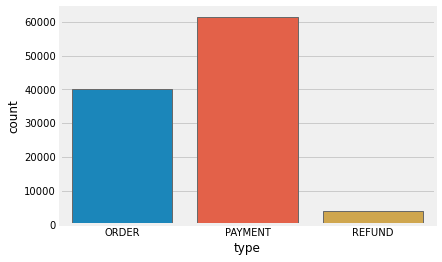

In [25]:
sns.countplot('type', data=data1)

In [10]:
data['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

<AxesSubplot:xlabel='state', ylabel='count'>

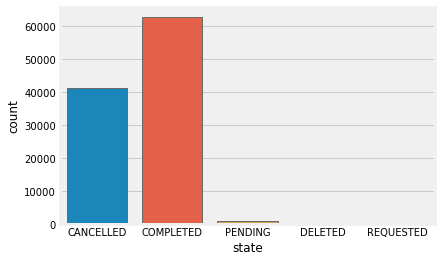

In [24]:
sns.countplot('state', data=data1)

In [13]:
data['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', '관리', '비즈니스', '지식콘텐츠', '일러스트', '파이낸스'],
      dtype=object)

<AxesSubplot:xlabel='category_title', ylabel='count'>

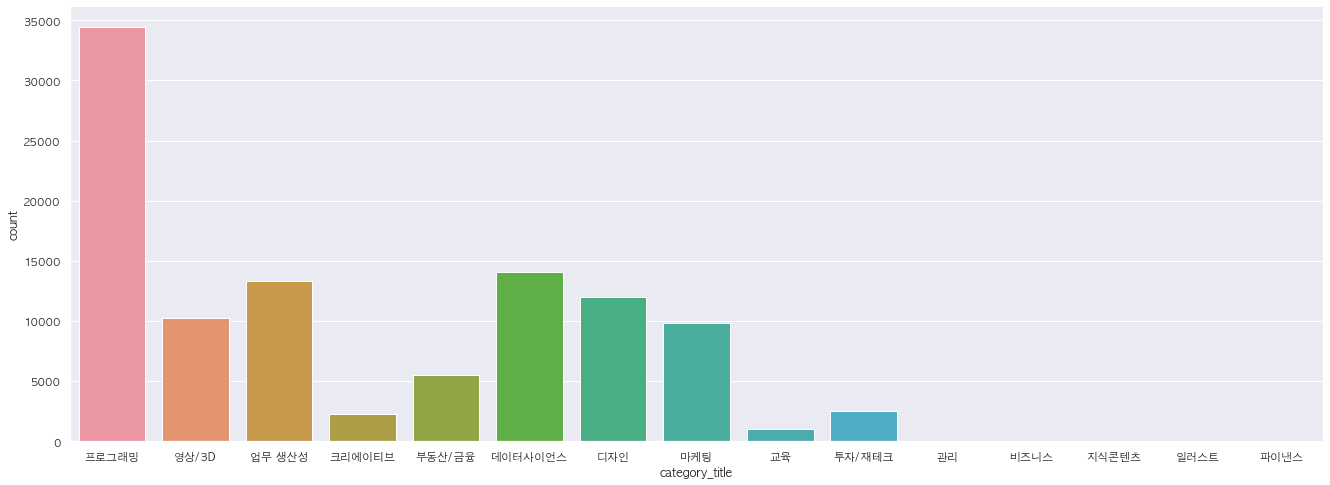

In [44]:
plt.figure(figsize = (20,8))
sns.countplot('category_title', data=data1)

 

In [14]:
data['format'].unique()

array(['올인원', '스쿨 온라인', '온라인 완주반', 'RED', 'B2B 온라인', '캠프', '스쿨', 'B2B',
       '이벤트', '하루10분컷', '아카이브', '관리', 'MBA', '콜로소', 'B2G'], dtype=object)

<AxesSubplot:xlabel='format', ylabel='count'>

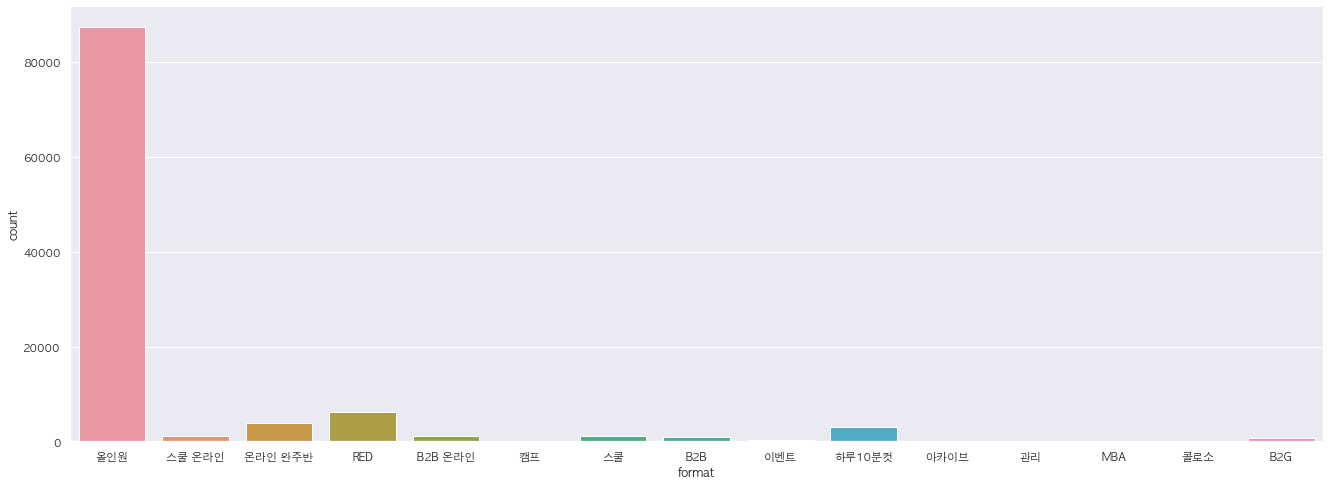

In [45]:
plt.figure(figsize = (20,8))
sns.countplot('format', data=data1)

In [15]:
data['pg'].unique()

array(['default', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'],
      dtype=object)

<AxesSubplot:xlabel='pg', ylabel='count'>

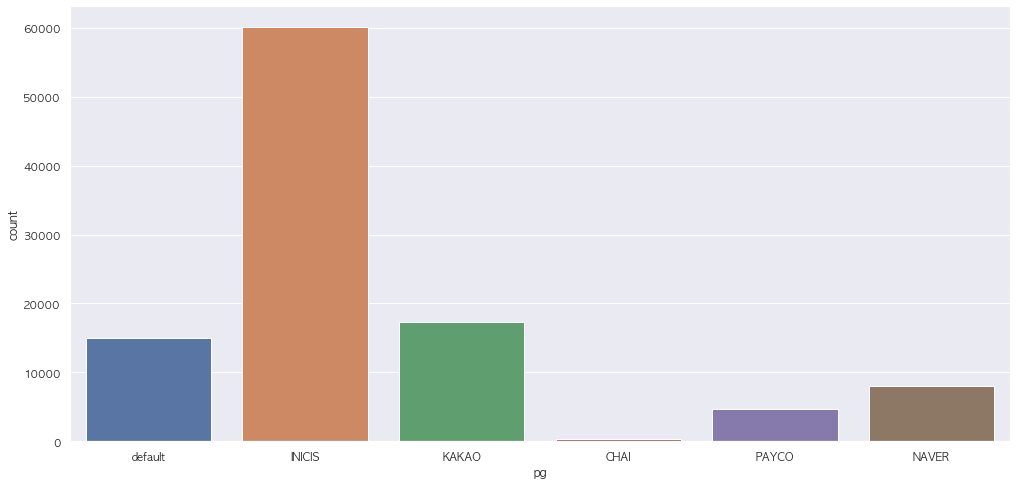

In [46]:
plt.figure(figsize = (15,8))
sns.countplot('pg', data=data1)

In [16]:
data['method'].unique()

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'POINT', 'VOUCHER'], dtype=object)

<AxesSubplot:xlabel='method', ylabel='count'>

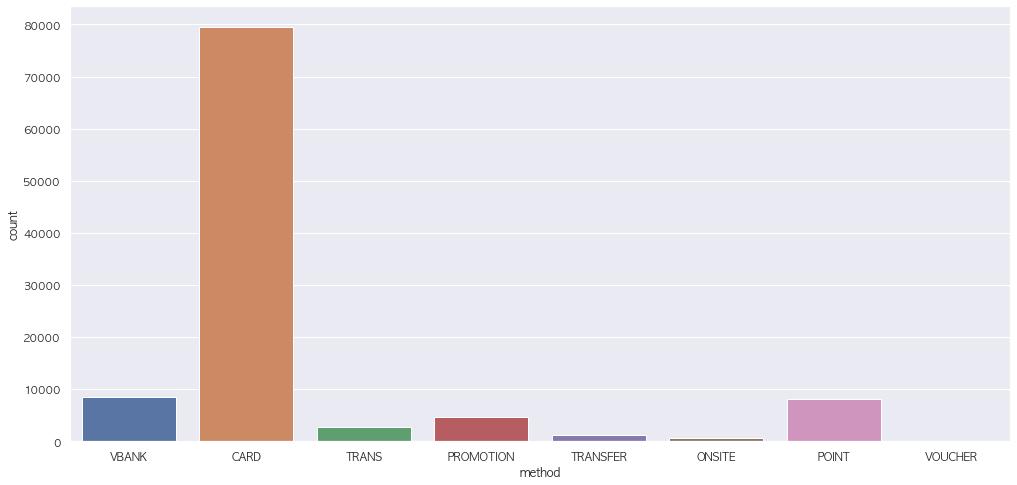

In [47]:
plt.figure(figsize = (15,8))
sns.countplot('method', data=data1) #카드사 할인?

### Plotly를 활용한 시각화

In [48]:
!pip install "jupyterlab>=3" "ipywidgets>=7.6"



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 6.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.8/342.8 KB 6.6 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.6/561.6 KB 9.9 MB/s eta 0:00:000:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 11.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for json5: filename=json5-0.9.8-py2.py3-none-any.whl size=18604 sha256=fcd8b64d708050404bffcd2cffe930515bb8d10ac3e68defad7a66230832e1bc
  Stored in directory: /Users/krc/Library/Caches/pip/wheels/ec/fb/6f/3a96bd8561194ae86da3c5101ed7462eb466ce35ea7a8

In [49]:
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 13.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.7/786.7 KB 13.0 MB/s eta 0:00:00 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=82ba8a43c66a4254626b19c0bc14fbe0c50888fef1e3975a971707469f7775ff
  Stored in directory: /Users/krc/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [65]:
import plotly.graph_objects as go 
fig = go.Figure(data=go.Bar(y=[2, 3, 1])) 
fig.write_html('first_figure.html', auto_open=True)


In [51]:
!pip install "notebook>=5.3" "ipywidgets>=7.5"


In [52]:
import plotly.graph_objects as go 
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()


### Dash 에서 실행하기


In [55]:
import plotly.graph_objects as go #or plotly.express as px 
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... ) 
# fig.update_layout( ... ) 
import dash 
import dash_core_components as dcc 
import dash_html_components as html 


In [61]:
import pandas as pd
import numpy as np
import scipy as sp
import chart_studio.plotly as py

In [60]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 2.0 MB/s eta 0:00:00


In [72]:
!pip install plotly==5.0.0
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 11.6 MB/s eta 0:00:00m eta 0:00:010:01:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.7.0
    Uninstalling plotly-5.7.0:
      Successfully uninstalled plotly-5.7.0


In [73]:
import plotly.plotly as py
import plotly.graph_objs as go

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [ ]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd
from plotly.offline import iplot
df = data1
table = ff.create_table(df)
py.iplot(table, filename='jupyter-table1')

https://plotly.com/python/ipython-notebook-tutorial/

https://github.com/santosjorge/cufflinks/issues/267

https://dailyheumsi.tistory.com/118